In [1]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import arabic_reshaper
from bidi.algorithm import get_display

In [2]:

base_url = "https://api.kfmc.med.sa/api/"
endpoints = {
    "satisfaction": "PatientSatisfaction/GetAll",
    "quality": "QualityAccreditations/GetAll",
    "rehab": "RehabilitationServices/GetAll",
    "medical": "MedicalServices/GetAll",
    "patient_services": "PatientsServices/GetAll"
}

dataframes = {}


for key, endpoint in endpoints.items():
    url = base_url + endpoint
    response = requests.get(url)
    if response.status_code == 200:
        data = response.json()
        df = pd.DataFrame(data)
        dataframes[key] = df
        print(f" {key} loaded ‚Äî shape: {df.shape}")
    else:
        print(f" Failed to load {key}, status: {response.status_code}")


 satisfaction loaded ‚Äî shape: (4, 7)
 quality loaded ‚Äî shape: (50, 2)
 rehab loaded ‚Äî shape: (9, 7)
 medical loaded ‚Äî shape: (18, 7)
 patient_services loaded ‚Äî shape: (10, 7)


In [3]:
df_satisfaction = dataframes["satisfaction"]
df_quality = dataframes["quality"]
df_rehab = dataframes["rehab"]
df_medical = dataframes["medical"]
df_patient_services = dataframes["patient_services"]


In [4]:
df_quality.info()
df_satisfaction.info()
df_rehab.info()
df_medical.info()
df_patient_services.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   QualityData  50 non-null     object
 1   Year         50 non-null     object
dtypes: object(2)
memory usage: 932.0+ bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ModuleEN  4 non-null      object 
 1   ModuleAR  4 non-null      object 
 2   2019      4 non-null      float64
 3   2020      4 non-null      float64
 4   2021      4 non-null      float64
 5   2022      4 non-null      float64
 6   2023      4 non-null      float64
dtypes: float64(5), object(2)
memory usage: 356.0+ bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 

In [5]:
df_satisfaction.head()


ModuleEN                                           ModuleAR  \
0    Patient Satisfaction           ŸÜÿ≥ÿ®ÿ© ÿ±ÿ∂ÿß ÿßŸÑŸÖÿ±ÿ∂Ÿâ ŸÅŸä ŸÖÿØŸäŸÜÿ© ÿßŸÑŸÖŸÑŸÉ ŸÅŸáÿØ ÿßŸÑÿ∑ÿ®Ÿäÿ©   
1  ER Patient Satisfaction  ŸÜÿ≥ÿ®ÿ© ÿ±ÿ∂ÿß ÿßŸÑŸÖÿ±ÿ∂Ÿâ ŸÅŸä ÿßŸÑÿ∑Ÿàÿßÿ±ÿ¶ ŸÅŸä ŸÖÿØŸäŸÜÿ© ÿßŸÑŸÖŸÑŸÉ ŸÅŸáÿØ ...   
2  Outpatient Satisfaction  ŸÜÿ≥ÿ®ÿ© ÿ±ÿ∂ÿß ÿßŸÑŸÖÿ±ÿ∂Ÿâ ŸÅŸä ÿßŸÑÿπŸäÿßÿØÿßÿ™ ÿßŸÑÿÆÿßÿ±ÿ¨Ÿäÿ© ŸÅŸä ŸÖÿØŸäŸÜÿ© ...   
3   Inpatient satisfaction  ŸÜÿ≥ÿ®ÿ© ÿ±ÿ∂ÿß ÿßŸÑŸÖÿ±ÿ∂Ÿâ ŸÅŸä ÿßŸÑÿ™ŸÜŸàŸäŸÖ ŸÅŸä ŸÖÿØŸäŸÜÿ© ÿßŸÑŸÖŸÑŸÉ ŸÅŸáÿØ ...   

     2019    2020    2021    2022    2023  
0  0.8197  0.8345  0.8492  0.8535  0.8637  
1  0.7390  0.7550  0.7280  0.7360  0.7872  
2  0.8180  0.8320  0.8530  0.8630  0.8656  
3  0.8810  0.8820  0.8970  0.8920  0.8856

In [6]:
df_quality.head()

QualityData  Year
0  ISO-27001-2005 (Info Security)   2005
1          ISO-22000 (Food Safety)  2008
2        ISO-9001-2008 (Operation)  2010
3                            CBAHI  2010
4                             CARF  2010

In [7]:
df_medical.head()

ServiceEN  \
0                              Medical Imaging Cases   
1                       Number of Clinical Lab Tests   
2  In vitro fertilization (IVF) Procedures (OPU, ...   
3  Total Endoscopy Procedures Adult and Pediatric...   
4      Number of Diagnostic Endoscopy exams (Adult)    

                                     ServiceAR       2019       2020  \
0  ÿπÿØÿØ ŸÅÿ≠Ÿàÿµÿßÿ™ ÿßŸÑÿ£ÿ¥ÿπÿ© ŸÅŸä ŸÖÿØŸäŸÜÿ© ÿßŸÑŸÖŸÑŸÉ ŸÅŸáÿØ ÿßŸÑÿ∑ÿ®Ÿäÿ©   215349.0   194831.0   
1                        ÿπÿØÿØ ÿßŸÑÿ™ÿ≠ÿßŸÑŸäŸÑ ÿßŸÑŸÖÿÆÿ®ÿ±Ÿäÿ©  6504871.0  7046979.0   
2         ÿπÿØÿØ ÿ•ÿ¨ÿ±ÿßÿ°ÿßÿ™ ÿßŸÑÿ•ÿÆÿµÿßÿ® ŸÅŸä ÿßŸÑŸÖÿÆÿ™ÿ®ÿ± (IVF)     3951.0     2215.0   
3       ÿπÿØÿØ ÿ•ÿ¨ÿ±ÿßÿ°ÿßÿ™ ÿßŸÑŸÖŸÜÿßÿ∏Ÿäÿ± ŸÑŸÑÿ®ÿßŸÑÿ∫ŸäŸÜ ŸàÿßŸÑÿ£ÿ∑ŸÅÿßŸÑ     6803.0     5425.0   
4       ÿπÿØÿØ ŸÅÿ≠Ÿàÿµÿßÿ™ ÿßŸÑŸÖŸÜÿßÿ∏Ÿäÿ± ÿßŸÑÿ™ÿ¥ÿÆŸäÿµŸäÿ© ŸÑŸÑÿ®ÿßŸÑÿ∫ŸäŸÜ     5001.0     3813.0   

        2021        2022        2023  
0   235507.0    256226.0    293472.0  
1  9290062.0  10940277.0  11486454.0  
2     4514.0      4404.0      4177.0  
3     7152.0      8364.0      9072.0  
4     5070.0      6274.0      6753.0

In [8]:
df_rehab.head()

ServiceEN  \
0  The total number of cases in physical medicine...   
1  Total number of cases in physiotherapy (outpat...   
2  Total number of cases in occupational therapy ...   
3  The total number of cases in speech disorders ...   
4  The total number of cases in artificial limbs ...   

                                           ServiceAR 2019 2020     2021  \
0  ÿπÿØÿØ ÿ≠ÿßŸÑÿßÿ™ ÿßŸÑÿ∑ÿ® ÿßŸÑŸÅŸäÿ≤Ÿäÿßÿ¶Ÿä ŸàÿßŸÑÿ™ÿ£ŸáŸäŸÑ ŸÅŸä ÿßŸÑÿπŸäÿßÿØÿßÿ™ ...    -    -  29649.0   
1  ÿπÿØÿØ ÿ≠ÿßŸÑÿßÿ™ ÿßŸÑÿπŸÑÿßÿ¨ ÿßŸÑÿ∑ÿ®ŸäÿπŸä ŸÅŸä ÿßŸÑÿπŸäÿßÿØÿßÿ™ ÿßŸÑÿÆÿßÿ±ÿ¨Ÿäÿ© ...    -    -  66658.0   
2  ÿπÿØÿØ ÿ≠ÿßŸÑÿßÿ™ ÿßŸÑÿπŸÑÿßÿ¨ ÿßŸÑŸàÿ∏ŸäŸÅŸä ŸÅŸä ÿßŸÑÿπŸäÿßÿØÿßÿ™ ÿßŸÑÿÆÿßÿ±ÿ¨Ÿäÿ© ...    -    -  31918.0   
3  ÿπÿØÿØ ÿ≠ÿßŸÑÿßÿ™ ÿßÿ∂ÿ∑ÿ±ÿßÿ®ÿßÿ™ ÿßŸÑŸÜÿ∑ŸÇ ŸàÿßŸÑÿ™ÿÆÿßÿ∑ÿ® ŸÅŸä ÿßŸÑÿπŸäÿßÿØÿßÿ™ ...    -    -  32779.0   
4  ÿπÿØÿØ ÿ≠ÿßŸÑÿßÿ™ ÿßŸÑÿ£ÿ∑ÿ±ÿßŸÅ ÿßŸÑÿµŸÜÿßÿπŸäÿ©  ŸÅŸä ÿßŸÑÿπŸäÿßÿØÿßÿ™ ÿßŸÑÿÆÿßÿ±ÿ¨...    -    -   7914.0   

      2022     2023  
0  80519.0  81087.0  
1  83369.0  96068.0  
2  35507.0  39183.0  
3  28711.0  24741.0  
4   9240.0   5445.0

In [9]:
df_patient_services.head()

ServiceEN  \
0                           Inpatient Admissions   
1                       Outpatient Total Visits    
2                          Virtual clinic Visits   
3  Total Number of Patient Accepted at Referral    
4                       Total of Oncology visits   

                                           ServiceAR      2019      2020  \
0  ÿπÿØÿØ ÿ≤Ÿäÿßÿ±ÿßÿ™ ŸÖÿ±ÿ∂Ÿâ ÿßŸÑÿ™ŸÜŸàŸäŸÖ ŸÅŸä ŸÖÿØŸäŸÜÿ© ÿßŸÑŸÖŸÑŸÉ ŸÅŸáÿØ ÿßŸÑÿ∑ÿ®Ÿäÿ©   27768.0   24775.0   
1  ÿπÿØÿØ ÿ≤Ÿäÿßÿ±ÿßÿ™ ŸÖÿ±ÿ∂Ÿâ ÿßŸÑÿπŸäÿßÿØÿßÿ™ ÿßŸÑÿÆÿßÿ±ÿ¨Ÿäÿ© ŸÅŸä ŸÖÿØŸäŸÜÿ© ÿßŸÑŸÖ...  517785.0  328038.0   
2                     ÿπÿØÿØ  ÿ≤Ÿäÿßÿ±ÿßÿ™ ÿßŸÑÿπŸäÿßÿØÿ© ÿßŸÑÿßŸÅÿ™ÿ±ÿßÿ∂Ÿäÿ©       NaN       NaN   
3    ÿπÿØÿØ ÿßŸÑÿ•ÿ≠ÿßŸÑÿßÿ™ ÿßŸÑŸÖŸÇÿ®ŸàŸÑÿ© ŸÅŸä ŸÖÿØŸäŸÜÿ© ÿßŸÑŸÖŸÑŸÉ ŸÅŸáÿØ ÿßŸÑÿ∑ÿ®Ÿäÿ©   72333.0   51364.0   
4                            ÿπÿØÿØ ÿ≤Ÿäÿßÿ±ÿßÿ™ ŸÖÿ±ŸÉÿ≤ ÿßŸÑÿ£Ÿàÿ±ÿßŸÖ       NaN   40408.0   

       2021      2022      2023  
0   25104.0   25151.0   27584.0  
1  428259.0  491696.0  589138.0  
2   31135.0   55293.0  123869.0  
3   92542.0   99856.0  130348.0  
4   43586.0   47126.0   56706.0

In [10]:
df_quality['Year'] = pd.to_numeric(df_quality['Year'], errors='coerce')

In [11]:
df_satisfaction.drop(columns=["ModuleEN"], inplace=True)
df_rehab.drop(columns=["ServiceEN"], inplace=True)
df_medical.drop(columns=["ServiceEN"], inplace=True)
df_patient_services.drop(columns=["ServiceEN"], inplace=True)


In [12]:
df_medical.head()

ServiceAR       2019       2020  \
0  ÿπÿØÿØ ŸÅÿ≠Ÿàÿµÿßÿ™ ÿßŸÑÿ£ÿ¥ÿπÿ© ŸÅŸä ŸÖÿØŸäŸÜÿ© ÿßŸÑŸÖŸÑŸÉ ŸÅŸáÿØ ÿßŸÑÿ∑ÿ®Ÿäÿ©   215349.0   194831.0   
1                        ÿπÿØÿØ ÿßŸÑÿ™ÿ≠ÿßŸÑŸäŸÑ ÿßŸÑŸÖÿÆÿ®ÿ±Ÿäÿ©  6504871.0  7046979.0   
2         ÿπÿØÿØ ÿ•ÿ¨ÿ±ÿßÿ°ÿßÿ™ ÿßŸÑÿ•ÿÆÿµÿßÿ® ŸÅŸä ÿßŸÑŸÖÿÆÿ™ÿ®ÿ± (IVF)     3951.0     2215.0   
3       ÿπÿØÿØ ÿ•ÿ¨ÿ±ÿßÿ°ÿßÿ™ ÿßŸÑŸÖŸÜÿßÿ∏Ÿäÿ± ŸÑŸÑÿ®ÿßŸÑÿ∫ŸäŸÜ ŸàÿßŸÑÿ£ÿ∑ŸÅÿßŸÑ     6803.0     5425.0   
4       ÿπÿØÿØ ŸÅÿ≠Ÿàÿµÿßÿ™ ÿßŸÑŸÖŸÜÿßÿ∏Ÿäÿ± ÿßŸÑÿ™ÿ¥ÿÆŸäÿµŸäÿ© ŸÑŸÑÿ®ÿßŸÑÿ∫ŸäŸÜ     5001.0     3813.0   

        2021        2022        2023  
0   235507.0    256226.0    293472.0  
1  9290062.0  10940277.0  11486454.0  
2     4514.0      4404.0      4177.0  
3     7152.0      8364.0      9072.0  
4     5070.0      6274.0      6753.0

----------------------------------------------------------------------------------------------------------------

In [13]:
df_satisfaction.info()
df_satisfaction.describe()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ModuleAR  4 non-null      object 
 1   2019      4 non-null      float64
 2   2020      4 non-null      float64
 3   2021      4 non-null      float64
 4   2022      4 non-null      float64
 5   2023      4 non-null      float64
dtypes: float64(5), object(1)
memory usage: 324.0+ bytes


2019      2020      2021      2022      2023
count  4.000000  4.000000  4.000000  4.000000  4.000000
mean   0.814425  0.825875  0.831800  0.836125  0.850525
std    0.058200  0.052552  0.072521  0.068729  0.043363
min    0.739000  0.755000  0.728000  0.736000  0.787200
25%    0.798250  0.812750  0.818900  0.824125  0.844575
50%    0.818850  0.833250  0.851100  0.858250  0.864650
75%    0.835025  0.846375  0.864000  0.870250  0.870600
max    0.881000  0.882000  0.897000  0.892000  0.885600

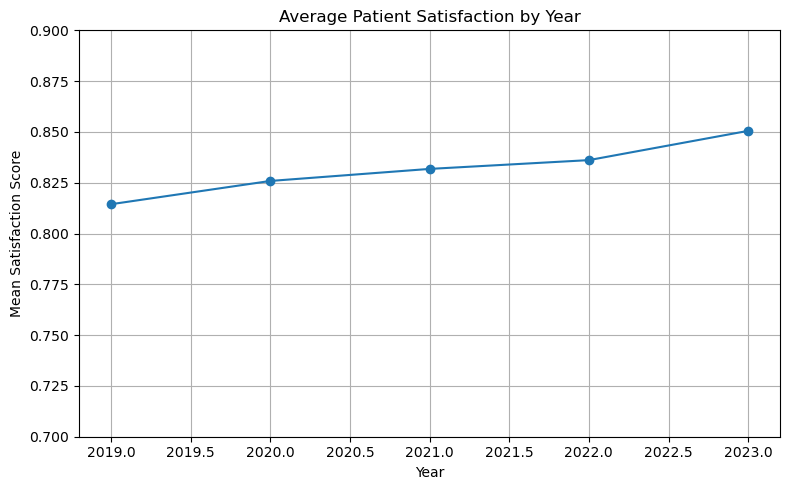

In [57]:
means = df_satisfaction.describe().loc["mean"]

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(means.index.astype(int), means.values, marker='o')
plt.title("Average Patient Satisfaction by Year")
plt.xlabel("Year")
plt.ylabel("Mean Satisfaction Score")
plt.ylim(0.7, 0.9)
plt.grid(True)
plt.tight_layout()
plt.savefig('kfmc1.png',dpi=300)
plt.show()


###  Average Patient Satisfaction Over Time

The line chart above illustrates the **mean patient satisfaction score** from 2019 to 2023. Over the five-year period, a **gradual upward trend** is observed in satisfaction levels:

- In **2019**, the average satisfaction score was approximately **0.815**
- By **2023**, it reached around **0.850**

This steady increase suggests **potential improvements in patient experience**, service quality, or institutional performance. However, further analysis is needed to determine the **causal factors** behind this trend, and whether these improvements are statistically or operationally significant.


--------------------------------------------------

In [15]:
df_satisfaction_long = df_satisfaction.melt(
    id_vars=["ModuleAR"],
    var_name="Year",
    value_name="Satisfaction"
)


In [16]:
df_satisfaction_long["Year"] = df_satisfaction_long["Year"].astype(int)


In [17]:
df_satisfaction_long['ModuleAR'] = df_satisfaction_long['ModuleAR'].apply(
    lambda x: get_display(arabic_reshaper.reshape(x))
)


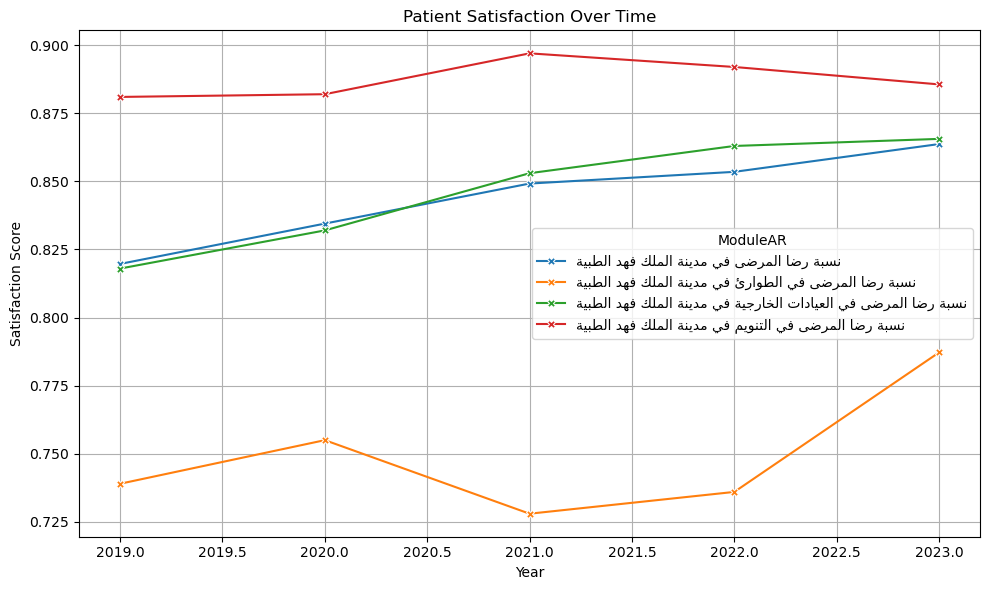

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.lineplot(
    data=df_satisfaction_long,
    x="Year",
    y="Satisfaction",
    hue="ModuleAR",
    marker="X"
)
plt.title("Patient Satisfaction Over Time")
plt.ylabel("Satisfaction Score")
plt.grid(True)
plt.tight_layout()
plt.savefig('kfmc2.png',dpi=300)
plt.show()


###  Patient Satisfaction Trends by Service Type (King Fahad Medical City)

The chart shows **patient satisfaction scores across different service modules** at King Fahad Medical City (KFMC) from **2019 to 2023**. Key insights:

- üî¥ **Inpatient satisfaction** consistently remained the highest, peaking around **0.898** in 2021, followed by a slight decline in 2023.
- üü¢ **Outpatient satisfaction** showed a steady increase from **0.82 to 0.87**, indicating continuous improvement in clinic services.
- üîµ **Overall satisfaction** followed a positive upward trend, closely aligned with outpatient feedback.
- üü† **Emergency satisfaction** was the lowest throughout the years, with fluctuations. It dropped in 2021 before rebounding in 2023 ‚Äî suggesting variable patient experiences in the ER.

This breakdown helps identify which departments may need **targeted quality interventions**, particularly the Emergency Department.


In [38]:

def reshape_arabic(text):
    from arabic_reshaper import reshape
    from bidi.algorithm import get_display
    return get_display(reshape(text))


C:\Users\wasee\AppData\Local\Temp\ipykernel_21312\3324854526.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_quality, x="Year", palette="Set2")


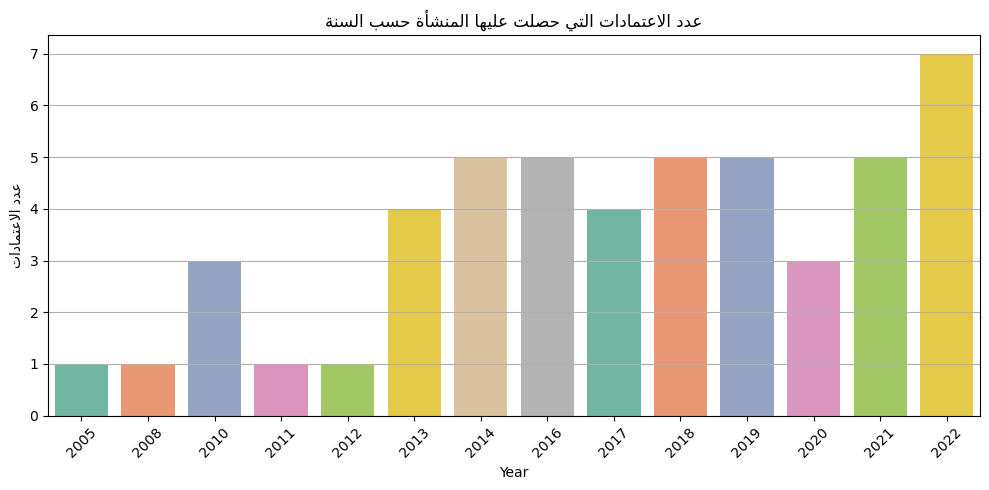

In [59]:
plt.figure(figsize=(10, 5))

sns.countplot(data=df_quality, x="Year", palette="Set2")

plt.title(reshape_arabic("ÿπÿØÿØ ÿßŸÑÿßÿπÿ™ŸÖÿßÿØÿßÿ™ ÿßŸÑÿ™Ÿä ÿ≠ÿµŸÑÿ™ ÿπŸÑŸäŸáÿß ÿßŸÑŸÖŸÜÿ¥ÿ£ÿ© ÿ≠ÿ≥ÿ® ÿßŸÑÿ≥ŸÜÿ©"))
plt.ylabel(reshape_arabic("ÿπÿØÿØ ÿßŸÑÿßÿπÿ™ŸÖÿßÿØÿßÿ™"))

plt.xticks(rotation=45)
plt.grid(axis="y")
plt.tight_layout()
plt.savefig('kfmc3.png',dpi=300)
plt.show()


###  Number of Accreditations Obtained by the Facility per Year

This bar chart illustrates the number of accreditations the facility received each year from 2005 to 2022.

####  Key Observations:

- There is a **gradual increase in the number of accreditations** over the years, reflecting ongoing efforts to improve quality and meet standards.
- The year **2022** recorded the highest number of accreditations (7), followed by 2016, 2019, and 2021 (each with 5 accreditations).
- Some years, such as **2005, 2008, 2011, and 2012**, had only one accreditation.
- This upward trend indicates a **positive trajectory in the facility‚Äôs performance and readiness to earn multiple accreditations in a single year**.

Such a pattern highlights the organization's commitment to excellence in healthcare quality.


In [21]:
accreditation_counts = df_quality.groupby("Year").size().reset_index(name="Accreditation_Count")


In [22]:
satisfaction_mean = df_satisfaction_long.groupby("Year")["Satisfaction"].mean().reset_index()


In [23]:
merged_df = pd.merge(accreditation_counts, satisfaction_mean, on="Year")


C:\Users\wasee\AppData\Local\Temp\ipykernel_21312\769435175.py:31: MatplotlibDeprecationWarning: An artist whose label starts with an underscore was passed to legend(); such artists will no longer be ignored in the future.  To suppress this warning, explicitly filter out such artists, e.g. with `[art for art in artists if not art.get_label().startswith('_')]`.
  ax1.legend(lines, labels, loc='upper left')


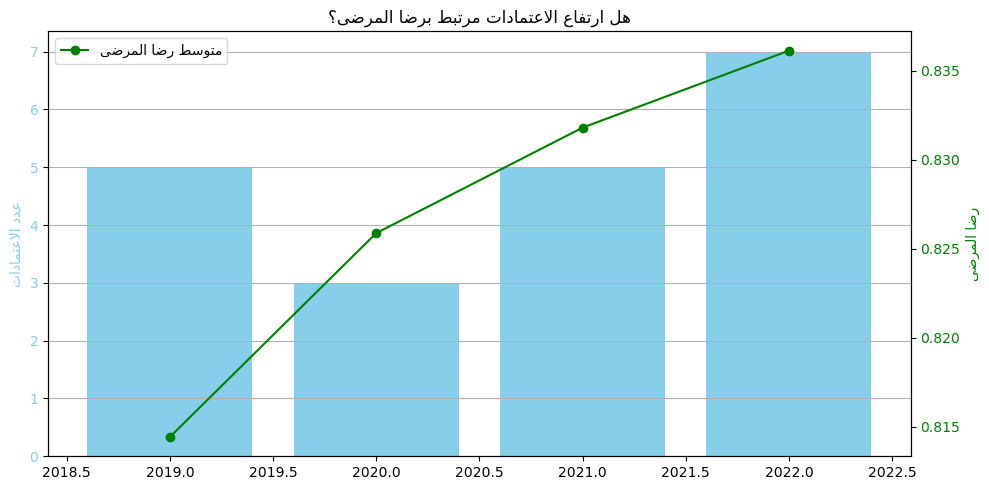

In [60]:
fig, ax1 = plt.subplots(figsize=(10, 5))

bars = ax1.bar(
    merged_df["Year"], 
    merged_df["Accreditation_Count"], 
    color='skyblue', 
    label="ÿπÿØÿØ ÿßŸÑÿßÿπÿ™ŸÖÿßÿØÿßÿ™"
)
ax1.set_ylabel(reshape_arabic("ÿπÿØÿØ ÿßŸÑÿßÿπÿ™ŸÖÿßÿØÿßÿ™"), color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')


ax2 = ax1.twinx()
line = ax2.plot(
    merged_df["Year"], 
    merged_df["Satisfaction"], 
    color='green', 
    marker='o', 
    label=reshape_arabic("ŸÖÿ™Ÿàÿ≥ÿ∑ ÿ±ÿ∂ÿß ÿßŸÑŸÖÿ±ÿ∂Ÿâ")
)
ax2.set_ylabel(reshape_arabic("ÿ±ÿ∂ÿß ÿßŸÑŸÖÿ±ÿ∂Ÿâ"), color='green')
ax2.tick_params(axis='y', labelcolor='green')


plt.title(reshape_arabic("ŸáŸÑ ÿßÿ±ÿ™ŸÅÿßÿπ ÿßŸÑÿßÿπÿ™ŸÖÿßÿØÿßÿ™ ŸÖÿ±ÿ™ÿ®ÿ∑ ÿ®ÿ±ÿ∂ÿß ÿßŸÑŸÖÿ±ÿ∂Ÿâÿü"))
ax1.grid(True, axis='y')


lines = list(bars) + list(line)
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='upper left')

plt.tight_layout()
plt.savefig('kfmc4.png',dpi=300)
plt.show()


In [25]:
from scipy.stats import pearsonr, spearmanr
pearson_corr, pearson_p = pearsonr(merged_df["Accreditation_Count"], merged_df["Satisfaction"])
print(f"Pearson correlation: {pearson_corr:.3f}, p-value: {pearson_p:.3f}")


Pearson correlation: 0.445, p-value: 0.555


In [26]:
spearman_corr, spearman_p = spearmanr(merged_df["Accreditation_Count"], merged_df["Satisfaction"])
print(f"Spearman correlation: {spearman_corr:.3f}, p-value: {spearman_p:.3f}")


Spearman correlation: 0.632, p-value: 0.368


###  Is the Rise in Accreditations Associated with Patient Satisfaction?

This combined bar and line chart examines the relationship between the **number of accreditations per year** (blue bars) and the **average patient satisfaction score** (green line) from 2019 to 2022.

####  Visual Insights:
- The number of accreditations fluctuated slightly across the years, peaking in 2022.
- Patient satisfaction shows a steady upward trend over the same period.
- This suggests a **potential positive association**, where years with more accreditations also show higher satisfaction scores.

####  Statistical Correlation:
Two correlation tests were conducted to statistically assess this relationship:

- **Pearson correlation** (measures linear relationship):
  - Correlation coefficient = **0.445**
  - p-value = **0.555** ‚Üí *Not statistically significant*

- **Spearman correlation** (measures monotonic relationship):
  - Correlation coefficient = **0.632**
  - p-value = **0.368** ‚Üí *Also not statistically significant*

####  Interpretation:
While the **visual trend** suggests a positive association, the **statistical results** indicate that the correlation is **not strong enough to be statistically significant**. This could be due to the **small number of data points** or other confounding variables.

> Further investigation using more data or advanced modeling may be needed to confirm this relationship.


--------------------------------------------------------------------------------------

In [27]:
df_melted = df_patient_services.melt(
    id_vars=["ServiceAR"],
    var_name="Year",
    value_name="ServiceValue"
)


In [28]:
df_melted

ServiceAR  Year  ServiceValue
0   ÿπÿØÿØ ÿ≤Ÿäÿßÿ±ÿßÿ™ ŸÖÿ±ÿ∂Ÿâ ÿßŸÑÿ™ŸÜŸàŸäŸÖ ŸÅŸä ŸÖÿØŸäŸÜÿ© ÿßŸÑŸÖŸÑŸÉ ŸÅŸáÿØ ÿßŸÑÿ∑ÿ®Ÿäÿ©  2019       27768.0
1   ÿπÿØÿØ ÿ≤Ÿäÿßÿ±ÿßÿ™ ŸÖÿ±ÿ∂Ÿâ ÿßŸÑÿπŸäÿßÿØÿßÿ™ ÿßŸÑÿÆÿßÿ±ÿ¨Ÿäÿ© ŸÅŸä ŸÖÿØŸäŸÜÿ© ÿßŸÑŸÖ...  2019      517785.0
2                      ÿπÿØÿØ  ÿ≤Ÿäÿßÿ±ÿßÿ™ ÿßŸÑÿπŸäÿßÿØÿ© ÿßŸÑÿßŸÅÿ™ÿ±ÿßÿ∂Ÿäÿ©  2019           NaN
3     ÿπÿØÿØ ÿßŸÑÿ•ÿ≠ÿßŸÑÿßÿ™ ÿßŸÑŸÖŸÇÿ®ŸàŸÑÿ© ŸÅŸä ŸÖÿØŸäŸÜÿ© ÿßŸÑŸÖŸÑŸÉ ŸÅŸáÿØ ÿßŸÑÿ∑ÿ®Ÿäÿ©  2019       72333.0
4                             ÿπÿØÿØ ÿ≤Ÿäÿßÿ±ÿßÿ™ ŸÖÿ±ŸÉÿ≤ ÿßŸÑÿ£Ÿàÿ±ÿßŸÖ  2019           NaN
5                ÿπÿØÿØ ÿ≤Ÿäÿßÿ±ÿßÿ™ ÿ±ÿπÿßŸäÿ© ÿßŸÑŸäŸàŸÖ ÿßŸÑŸàÿßÿ≠ÿØ ÿßŸÑÿ∑ÿ®Ÿäÿ©  2019       29085.0
6              ÿπÿØÿØ ÿ≤Ÿäÿßÿ±ÿßÿ™ ÿ±ÿπÿßŸäÿ© ÿßŸÑŸäŸàŸÖ ÿßŸÑŸàÿßÿ≠ÿØ ÿßŸÑÿ¨ÿ±ÿßÿ≠Ÿäÿ©  2019        3243.0
7                  ÿπÿØÿØ ÿ≤Ÿäÿßÿ±ÿßÿ™ ÿßŸÑÿ±ÿπÿßŸäÿ© ÿßŸÑÿµÿ≠Ÿäÿ© ÿßŸÑŸÖŸÜÿ≤ŸÑŸäÿ©  2019       30285.0
8          ÿπÿØÿØ ŸÖÿ±ÿßÿ¨ÿπŸäŸÜ ÿßŸÑÿ∫ÿØÿØ ÿßŸÑÿµŸÖÿßÿ° ŸàÿßŸÑÿ≥ŸÉÿ±Ÿä- ŸÑŸÑÿ®ÿßŸÑÿπŸäŸÜ  2019           NaN
9               ÿπÿØÿØ ŸÖÿ±ÿßÿ¨ÿπŸäŸÜ ÿßŸÑÿ∫ÿØÿØ ÿßŸÑÿµŸÖÿßÿ° ŸàÿßŸÑÿ≥ŸÉÿ±Ÿä-ÿµÿ∫ÿßÿ±  2019           NaN
10  ÿπÿØÿØ ÿ≤Ÿäÿßÿ±ÿßÿ™ ŸÖÿ±ÿ∂Ÿâ ÿßŸÑÿ™ŸÜŸàŸäŸÖ ŸÅŸä ŸÖÿØŸäŸÜÿ© ÿßŸÑŸÖŸÑŸÉ ŸÅŸáÿØ ÿßŸÑÿ∑ÿ®Ÿäÿ©  2020       24775.0
11  ÿπÿØÿØ ÿ≤Ÿäÿßÿ±ÿßÿ™ ŸÖÿ±ÿ∂Ÿâ ÿßŸÑÿπŸäÿßÿØÿßÿ™ ÿßŸÑÿÆÿßÿ±ÿ¨Ÿäÿ© ŸÅŸä ŸÖÿØŸäŸÜÿ© ÿßŸÑŸÖ...  2020      328038.0
12                     ÿπÿØÿØ  ÿ≤Ÿäÿßÿ±ÿßÿ™ ÿßŸÑÿπŸäÿßÿØÿ© ÿßŸÑÿßŸÅÿ™ÿ±ÿßÿ∂Ÿäÿ©  2020           NaN
13    ÿπÿØÿØ ÿßŸÑÿ•ÿ≠ÿßŸÑÿßÿ™ ÿßŸÑŸÖŸÇÿ®ŸàŸÑÿ© ŸÅŸä ŸÖÿØŸäŸÜÿ© ÿßŸÑŸÖŸÑŸÉ ŸÅŸáÿØ ÿßŸÑÿ∑ÿ®Ÿäÿ©  2020       51364.0
14                            ÿπÿØÿØ ÿ≤Ÿäÿßÿ±ÿßÿ™ ŸÖÿ±ŸÉÿ≤ ÿßŸÑÿ£Ÿàÿ±ÿßŸÖ  2020       40408.0
15               ÿπÿØÿØ ÿ≤Ÿäÿßÿ±ÿßÿ™ ÿ±ÿπÿßŸäÿ© ÿßŸÑŸäŸàŸÖ ÿßŸÑŸàÿßÿ≠ÿØ ÿßŸÑÿ∑ÿ®Ÿäÿ©  2020       31836.0
16             ÿπÿØÿØ ÿ≤Ÿäÿßÿ±ÿßÿ™ ÿ±ÿπÿßŸäÿ© ÿßŸÑŸäŸàŸÖ ÿßŸÑŸàÿßÿ≠ÿØ ÿßŸÑÿ¨ÿ±ÿßÿ≠Ÿäÿ©  2020        2154.0
17                 ÿπÿØÿØ ÿ≤Ÿäÿßÿ±ÿßÿ™ ÿßŸÑÿ±ÿπÿßŸäÿ© ÿßŸÑÿµÿ≠Ÿäÿ© ÿßŸÑŸÖŸÜÿ≤ŸÑŸäÿ©  2020       36806.0
18         ÿπÿØÿØ ŸÖÿ±ÿßÿ¨ÿπŸäŸÜ ÿßŸÑÿ∫ÿØÿØ ÿßŸÑÿµŸÖÿßÿ° ŸàÿßŸÑÿ≥ŸÉÿ±Ÿä- ŸÑŸÑÿ®ÿßŸÑÿπŸäŸÜ  2020           NaN
19              ÿπÿØÿØ ŸÖÿ±ÿßÿ¨ÿπŸäŸÜ ÿßŸÑÿ∫ÿØÿØ ÿßŸÑÿµŸÖÿßÿ° ŸàÿßŸÑÿ≥ŸÉÿ±Ÿä-ÿµÿ∫ÿßÿ±  2020           NaN
20  ÿπÿØÿØ ÿ≤Ÿäÿßÿ±ÿßÿ™ ŸÖÿ±ÿ∂Ÿâ ÿßŸÑÿ™ŸÜŸàŸäŸÖ ŸÅŸä ŸÖÿØŸäŸÜÿ© ÿßŸÑŸÖŸÑŸÉ ŸÅŸáÿØ ÿßŸÑÿ∑ÿ®Ÿäÿ©  2021       25104.0
21  ÿπÿØÿØ ÿ≤Ÿäÿßÿ±ÿßÿ™ ŸÖÿ±ÿ∂Ÿâ ÿßŸÑÿπŸäÿßÿØÿßÿ™ ÿßŸÑÿÆÿßÿ±ÿ¨Ÿäÿ© ŸÅŸä ŸÖÿØŸäŸÜÿ© ÿßŸÑŸÖ...  2021      428259.0
22                     ÿπÿØÿØ  ÿ≤Ÿäÿßÿ±ÿßÿ™ ÿßŸÑÿπŸäÿßÿØÿ© ÿßŸÑÿßŸÅÿ™ÿ±ÿßÿ∂Ÿäÿ©  2021       31135.0
23    ÿπÿØÿØ ÿßŸÑÿ•ÿ≠ÿßŸÑÿßÿ™ ÿßŸÑŸÖŸÇÿ®ŸàŸÑÿ© ŸÅŸä ŸÖÿØŸäŸÜÿ© ÿßŸÑŸÖŸÑŸÉ ŸÅŸáÿØ ÿßŸÑÿ∑ÿ®Ÿäÿ©  2021       92542.0
24                            ÿπÿØÿØ ÿ≤Ÿäÿßÿ±ÿßÿ™ ŸÖÿ±ŸÉÿ≤ ÿßŸÑÿ£Ÿàÿ±ÿßŸÖ  2021       43586.0
25               ÿπÿØÿØ ÿ≤Ÿäÿßÿ±ÿßÿ™ ÿ±ÿπÿßŸäÿ© ÿßŸÑŸäŸàŸÖ ÿßŸÑŸàÿßÿ≠ÿØ ÿßŸÑÿ∑ÿ®Ÿäÿ©  2021       30158.0
26             ÿπÿØÿØ ÿ≤Ÿäÿßÿ±ÿßÿ™ ÿ±ÿπÿßŸäÿ© ÿßŸÑŸäŸàŸÖ ÿßŸÑŸàÿßÿ≠ÿØ ÿßŸÑÿ¨ÿ±ÿßÿ≠Ÿäÿ©  2021        2289.0
27                 ÿπÿØÿØ ÿ≤Ÿäÿßÿ±ÿßÿ™ ÿßŸÑÿ±ÿπÿßŸäÿ© ÿßŸÑÿµÿ≠Ÿäÿ© ÿßŸÑŸÖŸÜÿ≤ŸÑŸäÿ©  2021       53354.0
28         ÿπÿØÿØ ŸÖÿ±ÿßÿ¨ÿπŸäŸÜ ÿßŸÑÿ∫ÿØÿØ ÿßŸÑÿµŸÖÿßÿ° ŸàÿßŸÑÿ≥ŸÉÿ±Ÿä- ŸÑŸÑÿ®ÿßŸÑÿπŸäŸÜ  2021       38750.0
29              ÿπÿØÿØ ŸÖÿ±ÿßÿ¨ÿπŸäŸÜ ÿßŸÑÿ∫ÿØÿØ ÿßŸÑÿµŸÖÿßÿ° ŸàÿßŸÑÿ≥ŸÉÿ±Ÿä-ÿµÿ∫ÿßÿ±  2021        7806.0
30  ÿπÿØÿØ ÿ≤Ÿäÿßÿ±ÿßÿ™ ŸÖÿ±ÿ∂Ÿâ ÿßŸÑÿ™ŸÜŸàŸäŸÖ ŸÅŸä ŸÖÿØŸäŸÜÿ© ÿßŸÑŸÖŸÑŸÉ ŸÅŸáÿØ ÿßŸÑÿ∑ÿ®Ÿäÿ©  2022       25151.0
31  ÿπÿØÿØ ÿ≤Ÿäÿßÿ±ÿßÿ™ ŸÖÿ±ÿ∂Ÿâ ÿßŸÑÿπŸäÿßÿØÿßÿ™ ÿßŸÑÿÆÿßÿ±ÿ¨Ÿäÿ© ŸÅŸä ŸÖÿØŸäŸÜÿ© ÿßŸÑŸÖ...  2022      491696.0
32                     ÿπÿØÿØ  ÿ≤Ÿäÿßÿ±ÿßÿ™ ÿßŸÑÿπŸäÿßÿØÿ© ÿßŸÑÿßŸÅÿ™ÿ±ÿßÿ∂Ÿäÿ©  2022       55293.0
33    ÿπÿØÿØ ÿßŸÑÿ•ÿ≠ÿßŸÑÿßÿ™ ÿßŸÑŸÖŸÇÿ®ŸàŸÑÿ© ŸÅŸä ŸÖÿØŸäŸÜÿ© ÿßŸÑŸÖŸÑŸÉ ŸÅŸáÿØ ÿßŸÑÿ∑ÿ®Ÿäÿ©  2022       99856.0
34                            ÿπÿØÿØ ÿ≤Ÿäÿßÿ±ÿßÿ™ ŸÖÿ±ŸÉÿ≤ ÿßŸÑÿ£Ÿàÿ±ÿßŸÖ  2022       47126.0
35               ÿπÿØÿØ ÿ≤Ÿäÿßÿ±ÿßÿ™ ÿ±ÿπÿßŸäÿ© ÿßŸÑŸäŸàŸÖ ÿßŸÑŸàÿßÿ≠ÿØ ÿßŸÑÿ∑ÿ®Ÿäÿ©  2022       28528.0
36             ÿπÿØÿØ ÿ≤Ÿäÿßÿ±ÿßÿ™ ÿ±ÿπÿßŸäÿ© ÿßŸÑŸäŸàŸÖ ÿßŸÑŸàÿßÿ≠ÿØ ÿßŸÑÿ¨ÿ±ÿßÿ≠Ÿäÿ©  2022        2336.0
37                

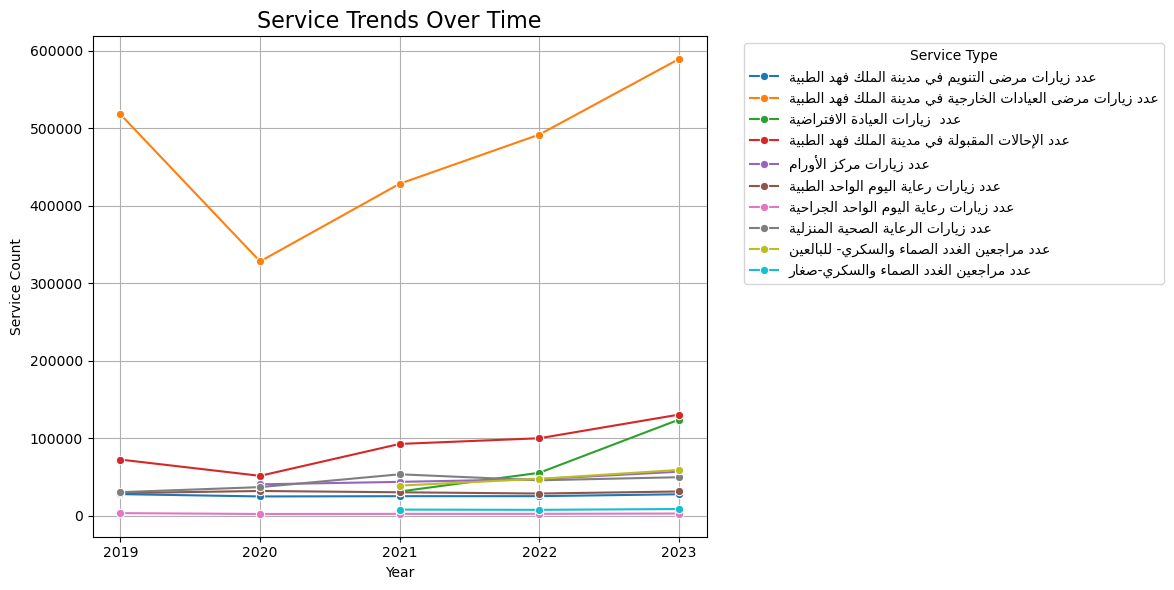

In [61]:
df_melted["ServiceAR_reshaped"] = df_melted["ServiceAR"].apply(reshape_arabic)
plt.figure(figsize=(12, 6)) 
sns.lineplot(
    data=df_melted,
    x="Year",
    y="ServiceValue",
    hue="ServiceAR_reshaped",
    marker="o"
)


plt.title("Service Trends Over Time", fontsize=16)
plt.xlabel("Year")
plt.ylabel("Service Count")
plt.legend(title=reshape_arabic("Service Type"), bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.savefig('kfmc5.png',dpi=300)
plt.show()


## Service Trends Over Time (2019‚Äì2023)
This line chart illustrates the yearly service volume across multiple healthcare service types in King Fahad Medical City from 2019 to 2023.

Most services show consistent growth, especially outpatient visits, referrals, and virtual clinic consultations.

Outpatient visits significantly decreased in 2020‚Äîlikely due to the COVID-19 pandemic‚Äîthen steadily increased to surpass pre-pandemic levels in 2023.

Referrals and virtual clinic visits began reporting data only from 2021 onwards, which is reflected by missing values (NaN) in 2020. This indicates either a late launch or delayed data availability for these services.

Chronic disease follow-up services (diabetes & endocrinology) for both adults and children also started from 2021, with no records shown in earlier years.

The overall upward trend in most services reflects improved accessibility, digital health integration, and increased patient demand.

‚ö†Ô∏è Note: The missing values (NaN) in 2020 for some services are not anomalies but due to service initiation dates or data recording practices.

----------------------------------------------------------------------------------------------------

In [53]:
df_melted_medical = df_medical.melt(
    id_vars=["ServiceAR"],
    var_name="Year",
    value_name= reshape_arabic("ServiceValue")
)


In [55]:
df_melted_medical = df_melted_medical.dropna(subset=['ServiceValue'])

df_melted_medical.sort_values(reshape_arabic('ServiceValue'), ascending=False)


ServiceAR  Year  ServiceValue
73                  ÿπÿØÿØ ÿßŸÑÿ™ÿ≠ÿßŸÑŸäŸÑ ÿßŸÑŸÖÿÆÿ®ÿ±Ÿäÿ©  2023    11486454.0
55                  ÿπÿØÿØ ÿßŸÑÿ™ÿ≠ÿßŸÑŸäŸÑ ÿßŸÑŸÖÿÆÿ®ÿ±Ÿäÿ©  2022    10940277.0
37                  ÿπÿØÿØ ÿßŸÑÿ™ÿ≠ÿßŸÑŸäŸÑ ÿßŸÑŸÖÿÆÿ®ÿ±Ÿäÿ©  2021     9290062.0
19                  ÿπÿØÿØ ÿßŸÑÿ™ÿ≠ÿßŸÑŸäŸÑ ÿßŸÑŸÖÿÆÿ®ÿ±Ÿäÿ©  2020     7046979.0
1                   ÿπÿØÿØ ÿßŸÑÿ™ÿ≠ÿßŸÑŸäŸÑ ÿßŸÑŸÖÿÆÿ®ÿ±Ÿäÿ©  2019     6504871.0
..                                    ...   ...           ...
80  ÿπÿØÿØ ÿ≠ÿßŸÑÿßÿ™ ÿßŸÑÿ£ŸÉÿ≥ÿ¨ÿ© ÿßŸÑÿ∫ÿ¥ÿßÿ¶Ÿäÿ© ÿÆÿßÿ±ÿ¨ ÿßŸÑÿ¨ÿ≥ŸÖ  2023          41.0
16           ÿπÿØÿØ ÿπŸÖŸÑŸäÿßÿ™ ÿ≤ÿ±ÿßÿπÿ© ÿßŸÑŸÇŸàŸÇÿπÿ©\r\n  2019          39.0
88           ÿπÿØÿØ ÿπŸÖŸÑŸäÿßÿ™ ÿ≤ÿ±ÿßÿπÿ© ÿßŸÑŸÇŸàŸÇÿπÿ©\r\n  2023          30.0
62  ÿπÿØÿØ ÿ≠ÿßŸÑÿßÿ™ ÿßŸÑÿ£ŸÉÿ≥ÿ¨ÿ© ÿßŸÑÿ∫ÿ¥ÿßÿ¶Ÿäÿ© ÿÆÿßÿ±ÿ¨ ÿßŸÑÿ¨ÿ≥ŸÖ  2022          30.0
26  ÿπÿØÿØ ÿ≠ÿßŸÑÿßÿ™ ÿßŸÑÿ£ŸÉÿ≥ÿ¨ÿ© ÿßŸÑÿ∫ÿ¥ÿßÿ¶Ÿäÿ© ÿÆÿßÿ±ÿ¨ ÿßŸÑÿ¨ÿ≥ŸÖ  2020          18.0

[87 rows x 3 columns]

In [69]:
def get_top_services_data(df, group_col, target_col, n=10):
    """Return dataframe filtered to top N categories by sum of target_col."""
    top_services = df.groupby(group_col)[target_col].sum().nlargest(n).index
    return df[df[group_col].isin(top_services)]


C:\Users\wasee\AppData\Local\Temp\ipykernel_21312\1892673498.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top['ServiceAR_reshaped'] = df_top['ServiceAR'].apply(reshape_arabic)


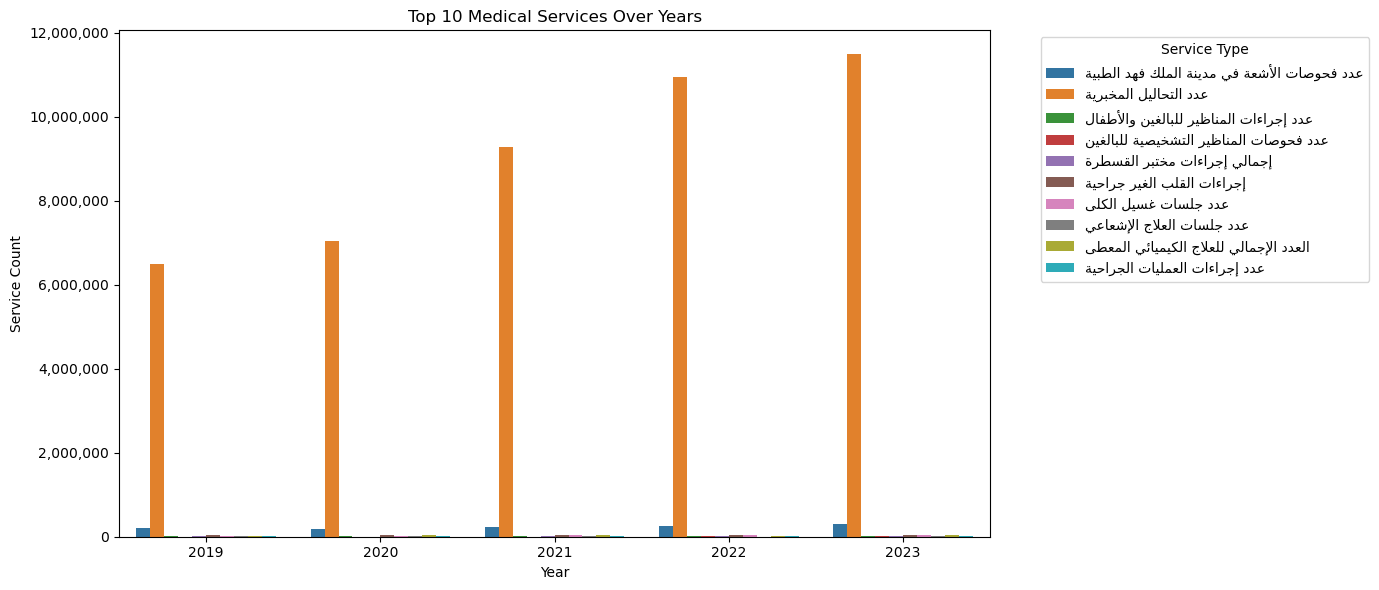

In [72]:

df_melted_medical['ServiceAR_reshaped'] = df_melted_medical['ServiceAR'].apply(reshape_arabic)


df_top = get_top_services_data(df_melted_medical, 'ServiceAR', 'ServiceValue', n=10)


df_top['ServiceAR_reshaped'] = df_top['ServiceAR'].apply(reshape_arabic)

plt.figure(figsize=(14, 6))
sns.barplot(data=df_top, x='Year', y='ServiceValue', hue='ServiceAR_reshaped')

plt.title('Top 10 Medical Services Over Years')
plt.xlabel('Year')
plt.ylabel('Service Count')
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.legend(title='Service Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('kfmc6.png', dpi=300)
plt.show()


## Top 10 Medical Services Over the Years (2019‚Äì2023)

The bar chart above illustrates the top 10 medical services provided in King Fahd Medical City across five years (2019 to 2023). The services were selected based on the total number of procedures or sessions performed.

### Key Observations:
- **Laboratory tests** dominate with a significantly higher count than any other service, showing steady growth from 6.5 million in 2019 to over 11 million in 2023.
- **Radiological exams, endoscopy procedures, dialysis sessions, and surgical operations** are also among the most frequent services.
- The chart reflects a consistent increase in service volume over the years, indicating a growing demand and expansion in healthcare delivery.
- Services such as **chemotherapy, cardiac catheterization, and non-surgical heart procedures** remain essential but with relatively lower volumes.

> Note: The values are shown in actual counts (not in scientific notation), and Arabic labels were reshaped for proper display.
